In [199]:
#data manipulation
import numpy as np 
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set a few plotting defaults
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

In [200]:
# Read in  data
play = pd.read_csv('play_evaluation.csv', sep=';')
sales = pd.read_csv('sales_evaluation.csv', sep=';')
play.head()

,Date,Platform,build_version,client_id,outcome,experience_points
0,2015-12-08,PC,1.0.2,pczzdp11e6p,win,295.636308
1,2015-11-14,PS4,1.0.1,p231ep4ebbp,win,510.737943
2,2015-11-26,PS4,1.0.1,p1321p488fp,win,333.307999
3,2015-12-03,PC,1.0.1,pzda4p4z98p,win,542.839919
4,2015-11-22,PC,1.0.1,pe8e7p40a9p,win,381.683084


In [201]:
play.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
Date                 30000 non-null object
Platform             30000 non-null object
build_version        30000 non-null object
client_id            30000 non-null object
outcome              30000 non-null object
experience_points    30000 non-null float64
dtypes: float64(1), object(5)
memory usage: 1.4+ MB


In [202]:
play = play.replace('2015-11-31', np.nan).dropna()

In [203]:
play['Date'] = pd.to_datetime(play['Date'])

In [204]:
play.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29084 entries, 0 to 29999
Data columns (total 6 columns):
Date                 29084 non-null datetime64[ns]
Platform             29084 non-null object
build_version        29084 non-null object
client_id            29084 non-null object
outcome              29084 non-null object
experience_points    29084 non-null float64
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 1.6+ MB


In [205]:
sales.head()

,store_item_name,client_id,Date,dollar_spent
0,pack_a,pac2dp471ap,2015-12-02,0.99
1,pack_a,p6718p11e7p,2015-12-08,0.99
2,bundle_9,pczbap4facp,2015-11-23,18.50
3,pack_a,p606cp4fe8p,2015-11-25,0.99
4,pack_b,pc06ep11e6p,2015-11-18,1.20


In [206]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5936 entries, 0 to 5935
Data columns (total 4 columns):
store_item_name    5936 non-null object
client_id          5936 non-null object
Date               5936 non-null object
dollar_spent       5936 non-null float64
dtypes: float64(1), object(3)
memory usage: 185.6+ KB


In [207]:
sales = sales.replace('2015-11-31', np.nan).dropna()

In [208]:
sales['Date'] = pd.to_datetime(sales['Date'])

In [209]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5733 entries, 0 to 5935
Data columns (total 4 columns):
store_item_name    5733 non-null object
client_id          5733 non-null object
Date               5733 non-null datetime64[ns]
dollar_spent       5733 non-null float64
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 223.9+ KB


#### Checking for missing values

In [210]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [211]:
# Missing values statistics
missing_values = missing_values_table(play)
missing_values.head()

Your selected dataframe has 6 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [212]:
# Missing values statistics
missing_values = missing_values_table(sales)
missing_values.head()

Your selected dataframe has 4 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


### Question A

- Daily Active User* segmented by platform

In [213]:
play.groupby(['Date', 'Platform']).count()

build_version  client_id  outcome  experience_points
Date       Platform                                                      
2015-11-12 PC                  580        580      580                580
           PS4                 265        265      265                265
2015-11-13 PC                  589        589      589                589
           PS4                 299        299      299                299
2015-11-14 PC                  614        614      614                614
           PS4                 261        261      261                261
2015-11-15 PC                  643        643      643                643
           PS4                 304        304      304                304
2015-11-16 PC                  597        597      597                597
           PS4                 252        252      252                252
2015-11-17 PC                  788        788      788                788
           PS4                 334        334      334                334
2015-11-18 PC                  737        737      737                737
           PS4                 335        335      335                335
2015-11-19 PC                  557        557      557                557
           PS4                 261        261      261                261
2015-11-20 PC                  476        476      476                476
           PS4                 217        217      217                217
2015-11-21 PC                  535        535      535                535
           PS4                 263        263      263                263
2015-11-22 PC                  491        491      491                491
           PS4                 227        227      227                227
2015-11-23 PC                  544        544      544                544
           PS4                 279        279      279                279
2015-11-24 PC                  681        681      681                681
           PS4                 340        340      340                340
2015-11-25 PC                  646        646      646                646
           PS4                 375        375      375                375
2015-11-26 PC                  559        559      559                559
           PS4                 254        254      254                254
...                            ...        ...      ...                ...
2015-11-28 PC                  553        553      553                553
           PS4                 349        349      349                349
2015-11-29 PC                  555        555      555                555
           PS4                 294        294      294                294
2015-11-30 PC                  538        538      538                538
           PS4                 353        353      353                353
2015-12-01 PC                  568        568      568                568
           PS4                 390        390      390                390
2015-12-02 PC                  536        536      536                536
           PS4                 345        345      345                345
2015-12-03 PC                  497        497      497                497
           PS4                 334        334      334                334
2015-12-04 PC                  540        540      540                540
           PS4                 436        436      436                436
2015-12-05 PC                  581        581      581                581
           PS4                 505        505      505                505
2015-12-06 PC                  560        560      560                560
           PS4                 468        468      468                468
2015-12-07 PC                  664        664      664                664
           PS4                 629        629      629                629
2015-12-08 PC                  688        688      688                688
           PS4           

In [214]:
sales.rename(columns={'Date':'Period'}, inplace=True)

- Daily Active Customer* segmented by platform

In [215]:
play= play.merge(sales, on = 'client_id', how = 'left')

In [216]:
play.head()

,Date,Platform,build_version,client_id,outcome,experience_points,store_item_name,Period,dollar_spent
0,2015-12-08,PC,1.0.2,pczzdp11e6p,win,295.636308,pack_c,2015-12-02,1.99
1,2015-12-08,PC,1.0.2,pczzdp11e6p,win,295.636308,pack_a,2015-12-08,0.99
2,2015-12-08,PC,1.0.2,pczzdp11e6p,win,295.636308,pack_c,2015-11-19,1.99
3,2015-12-08,PC,1.0.2,pczzdp11e6p,win,295.636308,bundle_1,2015-12-05,15.99
4,2015-12-08,PC,1.0.2,pczzdp11e6p,win,295.636308,pack_a,2015-12-11,0.99


In [217]:
play.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80543 entries, 0 to 80542
Data columns (total 9 columns):
Date                 80543 non-null datetime64[ns]
Platform             80543 non-null object
build_version        80543 non-null object
client_id            80543 non-null object
outcome              80543 non-null object
experience_points    80543 non-null float64
store_item_name      68504 non-null object
Period               68504 non-null datetime64[ns]
dollar_spent         68504 non-null float64
dtypes: datetime64[ns](2), float64(2), object(5)
memory usage: 6.1+ MB


In [218]:
missing_values = missing_values_table(play)
missing_values.head()

Your selected dataframe has 9 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
store_item_name,12039,14.9
Period,12039,14.9
dollar_spent,12039,14.9


In [219]:
play.dropna(subset = ['store_item_name', 'Period', 'dollar_spent'])

,Date,Platform,build_version,client_id,outcome,experience_points,store_item_name,Period,dollar_spent
0,2015-12-08,PC,1.0.2,pczzdp11e6p,win,295.636308,pack_c,2015-12-02,1.99
1,2015-12-08,PC,1.0.2,pczzdp11e6p,win,295.636308,pack_a,2015-12-08,0.99
2,2015-12-08,PC,1.0.2,pczzdp11e6p,win,295.636308,pack_c,2015-11-19,1.99
3,2015-12-08,PC,1.0.2,pczzdp11e6p,win,295.636308,bundle_1,2015-12-05,15.99
4,2015-12-08,PC,1.0.2,pczzdp11e6p,win,295.636308,pack_a,2015-12-11,0.99
5,2015-12-08,PC,1.0.2,pczzdp11e6p,win,295.636308,pack_a,2015-11-14,0.99
10,2015-12-04,PC,1.0.2,p9873p11e7p,lose,268.443363,pack_a,2015-11-25,0.99
11,2015-12-04,PC,1.0.2,p9873p11e7p,lose,268.443363,pack_a,2015-11-24,0.99
12,2015-12-04,PC,1.0.2,p9873p11e7p,lose,268.443363,pack_a,2015-11-14,0.99
13,2015-12-04,PC,1.0.2,p9873p11e7p,lose,268.443363,bundle_3,2015-12-08,21.99


In [220]:
play.groupby(['Period', 'Platform']).count()

Date  build_version  client_id  outcome  \
Period     Platform                                            
2015-11-12 PC        1306           1306       1306     1306   
           PS4       1071           1071       1071     1071   
2015-11-13 PC        1088           1088       1088     1088   
           PS4        771            771        771      771   
2015-11-14 PC        1482           1482       1482     1482   
           PS4        830            830        830      830   
2015-11-15 PC        1245           1245       1245     1245   
           PS4        789            789        789      789   
2015-11-16 PC        1220           1220       1220     1220   
           PS4        524            524        524      524   
2015-11-17 PC        1319           1319       1319     1319   
           PS4        993            993        993      993   
2015-11-18 PC        1330           1330       1330     1330   
           PS4       1030           1030       1030     1030   
2015-11-19 PC        1341           1341       1341     1341   
           PS4       1016           1016       1016     1016   
2015-11-20 PC        1380           1380       1380     1380   
           PS4        671            671        671      671   
2015-11-21 PC        1459           1459       1459     1459   
           PS4       1061           1061       1061     1061   
2015-11-22 PC        1253           1253       1253     1253   
           PS4        907            907        907      907   
2015-11-23 PC        1511           1511       1511     1511   
           PS4        893            893        893      893   
2015-11-24 PC        1432           1432       1432     1432   
           PS4        826            826        826      826   
2015-11-25 PC        1414           1414       1414     1414   
           PS4       1024           1024       1024     1024   
2015-11-26 PC         964            964        964      964   
           PS4        718            718        718      718   
...                   ...            ...        ...      ...   
2015-11-28 PC        1375           1375       1375     1375   
           PS4        877            877        877      877   
2015-11-29 PC        1280           1280       1280     1280   
           PS4        909            909        909      909   
2015-11-30 PC        1260           1260       1260     1260   
           PS4        901            901        901      901   
2015-12-01 PC        1390           1390       1390     1390   
           PS4       1014           1014       1014     1014   
2015-12-02 PC        1220           1220       1220     1220   
           PS4       1122           1122       1122     1122   
2015-12-03 PC        1618           1618       1618     1618   
           PS4        737            737        737      737   
2015-12-04 PC        1180           1180       1180     1180   
           PS4        731            731        731      731   
2015-12-05 PC        1299           1299       1299     1299   
           PS4        919            919        919      919   
2015-12-06 PC        1399           1399       1399     1399   
           PS4       1126           1126       1126     1126   
2015-12-07 PC        1088           1088       1088     1088   
           PS4        763            763        763      763   
2015-12-08 PC        1425           1425       1425     1425   
           PS4        810            810        810      810   
2015-12-09 PC        1428           1428       1428     1428   
           PS4        771            771        771      771   
2015-12-10 PC        1601           1601       1601     1601   
           PS4        989            989        989      989   
2015-12-11 PC        1573           1573       1573     1573   
           PS4        827            827        827      827   
2015-12-12 PC        1150           1150       1150     1150   
           PS4        758            758        758  

- Daily Revenue* segmented by platform

In [221]:
play.groupby(['Period', 'Platform'], as_index=True).sum()


experience_points  dollar_spent
Period     Platform                                 
2015-11-12 PC            546530.307789       7787.86
           PS4           450657.901276       6892.36
2015-11-13 PC            445830.804479       4182.08
           PS4           325679.739188       3930.50
2015-11-14 PC            612012.866534       5225.48
           PS4           346466.637441       3509.31
2015-11-15 PC            515440.599178       8007.26
           PS4           332636.865670       4169.84
2015-11-16 PC            505562.291821       6410.93
           PS4           213715.649253       2744.24
2015-11-17 PC            551330.963664       6262.46
           PS4           409688.024347       2971.13
2015-11-18 PC            556201.182539       7810.34
           PS4           426204.964307       6819.16
2015-11-19 PC            560070.668584       7194.86
           PS4           420420.726759       5895.93
2015-11-20 PC            566650.535720       6187.83
           PS4           280450.242775       3302.30
2015-11-21 PC            608004.837848       6628.07
           PS4           443240.915677       4346.01
2015-11-22 PC            511454.619811       4455.80
           PS4           378925.883575       5230.97
2015-11-23 PC            632272.479012       7847.73
           PS4           369095.013529       3933.31
2015-11-24 PC            591662.499385       7957.43
           PS4           342016.052032       4645.89
2015-11-25 PC            585389.282922       7689.80
           PS4           420408.955585       5544.92
2015-11-26 PC            401502.324535       6169.69
           PS4           300452.108283       2010.35
...                                ...           ...
2015-11-28 PC            562785.914574       5024.32
           PS4           361168.050437       4514.96
2015-11-29 PC            532074.320289       8030.57
           PS4           378266.879533       6356.65
2015-11-30 PC            519927.760656       5670.13
           PS4           378307.265651       3583.55
2015-12-01 PC            573676.369067       7530.44
           PS4           420543.745077       4426.86
2015-12-02 PC            509806.710023       6853.90
           PS4           466728.886899       6981.20
2015-12-03 PC            662477.296916       8252.26
           PS4           305837.465113       3886.20
2015-12-04 PC            491505.418957       9591.21
           PS4           303711.254867       4312.27
2015-12-05 PC            538725.095473       5444.57
           PS4           380359.219612       4698.55
2015-12-06 PC            579778.980471       5638.14
           PS4           472869.911242       5478.07
2015-12-07 PC            456509.398871       4730.31
           PS4           312506.251884       2520.15
2015-12-08 PC            591264.129547       7451.77
           PS4           339731.690332       5021.79
2015-12-09 PC            590869.544131       7127.35
           PS4           320192.747180       3230.62
2015-12-10 PC            667480.001499      12785.77
           PS4           418212.064303       6570.82
2015-12-11 PC            647997.363496       7376.36
           PS4           342766.500998       4725.83
2015-12-12 PC            478121.863597       5323.17
           PS4           317016.177895       2290.53

[62 rows x 2 columns]

- Daily Conversion* segmented by platform

### Question B

Just to take a quick look at which build version and item brings the highest revenue (set apart from the client id)

In [222]:
play.groupby(['build_version']).sum()

,experience_points,dollar_spent
build_version,,
1.0.1,2.166129e+07,230226.54
1.0.2,1.180162e+07,120691.91


It seems that the __first built version, 1.01., brought the highest revenue__. We can guess from the experience points that it might be due to the fact that players sticked with the first version, and did not update the game.

In [223]:
 dr=play.groupby(['store_item_name'],as_index=False).sum()
dr.head()

,store_item_name,experience_points,dollar_spent
0,bundle_1,9.850839e+05,37800.36
1,bundle_10,1.097678e+06,48729.00
2,bundle_2,8.852011e+05,3198.00
3,bundle_3,1.037321e+06,54689.13
4,bundle_8,1.080563e+06,48155.50


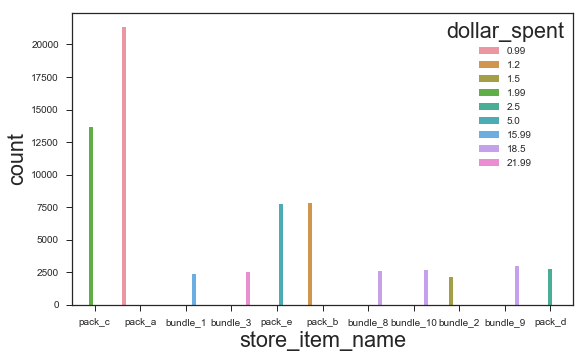

In [224]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
fig.set_size_inches(8, 5)
ax = sns.countplot(x="store_item_name", hue="dollar_spent", data=play)

In [225]:
play.groupby('store_item_name')['dollar_spent'].sum().max()

54982.0

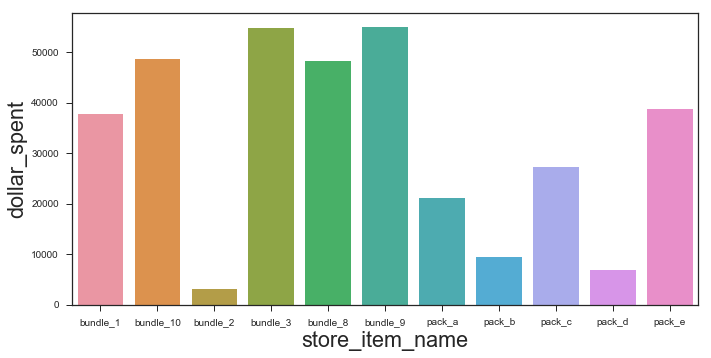

In [226]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.set(style="whitegrid")
ax = sns.barplot(x="store_item_name", y="dollar_spent", data=dr)

In [227]:
play.groupby('store_item_name')['dollar_spent'].sum().max()

54982.0

From the plot above, it results that __bundle_9 brings the highest revenue__, although the __item most aquired is pack_a__, due to the fact that is the cheapest

In [228]:
play['Period'].min()

Timestamp('2015-11-12 00:00:00')

In [229]:
play['Period'].max()

Timestamp('2015-12-12 00:00:00')

In [230]:
import datetime as dt
NOW = dt.datetime(2015,12,12)

In [231]:
play['Period'] = pd.to_datetime(play['Period'])

In [232]:
rfmTable = play.groupby('client_id',as_index=False).agg({'Period': lambda x: (NOW - x.max()).days, # Recency
                                        'store_item_name': lambda x: x.count(),      # Pack
                                        'dollar_spent': lambda x: x.sum(),  # Monetary Value
                                         'experience_points': lambda x: x.sum()}) # Player level
                                         

#rfmTable['Period'] = rfmTable['Period'].astype(int)
rfmTable.rename(columns={'Period': 'recency', 
                         'store_item_name': 'Pack', 
                         'dollar_spent': 'monetary_value',
                         'experience_points':'Level'}, inplace=True)

In [233]:
rfmTable.head()

,client_id,recency,Pack,monetary_value,Level
0,p0016p4a0ap,2.0,10,185.00,4078.383183
1,p0044p434bp,9.0,20,197.45,8909.580270
2,p004dp4a20p,2.0,60,389.40,25476.006447
3,p00c0p4ab6p,NaN,0,0.00,10193.103499
4,p00c9p11e7p,1.0,6,5.94,2217.575294


The easies way to split metrics into segments is by using quartile.

1. This gives us a starting point for detailed analysis
2. 4 segments are easy to understand and explain

In [234]:
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles

,recency,Pack,monetary_value,Level
0.25,2.0,2.0,1.980,1695.025389
0.50,5.0,8.0,31.580,6519.384756
0.75,11.0,42.0,160.995,21996.793340


In [235]:
quantiles = quantiles.to_dict()
quantiles

{'Level': {0.25: 1695.0253887308968,
  0.5: 6519.38475647831,
  0.75: 21996.79333973729},
 'Pack': {0.25: 2.0, 0.5: 8.0, 0.75: 42.0},
 'monetary_value': {0.25: 1.98, 0.5: 31.58, 0.75: 160.995},
 'recency': {0.25: 2.0, 0.5: 5.0, 0.75: 11.0}}

Create a segmented RFM table

In [236]:
segmented_rfm = rfmTable

In [237]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def LevelScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    

In [238]:
segmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(RScore, args=('recency',quantiles,))
segmented_rfm['level_quartile'] = segmented_rfm['Level'].apply(LevelScore, args=('Level',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(LevelScore, args=('monetary_value',quantiles,))

Add segment numbers to the RFM table

In [239]:
segmented_rfm.head()

,client_id,recency,Pack,monetary_value,Level,r_quartile,level_quartile,m_quartile
0,p0016p4a0ap,2.0,10,185.00,4078.383183,1,3,1
1,p0044p434bp,9.0,20,197.45,8909.580270,3,2,1
2,p004dp4a20p,2.0,60,389.40,25476.006447,1,1,1
3,p00c0p4ab6p,NaN,0,0.00,10193.103499,4,2,4
4,p00c9p11e7p,1.0,6,5.94,2217.575294,1,3,3


RFM segments split your customer base into an imaginary 3D cube. It is hard to visualize. However, we can sort it out.

Add a new column to combine RLM score, 111 is the highest score as we determined earlier.

In [240]:
segmented_rfm['RLMScore'] = segmented_rfm.r_quartile.map(str) \
                            + segmented_rfm.level_quartile.map(str) \
                            + segmented_rfm.m_quartile.map(str)
segmented_rfm.head()

,client_id,recency,Pack,monetary_value,Level,r_quartile,level_quartile,m_quartile,RLMScore
0,p0016p4a0ap,2.0,10,185.00,4078.383183,1,3,1,131
1,p0044p434bp,9.0,20,197.45,8909.580270,3,2,1,321
2,p004dp4a20p,2.0,60,389.40,25476.006447,1,1,1,111
3,p00c0p4ab6p,NaN,0,0.00,10193.103499,4,2,4,424
4,p00c9p11e7p,1.0,6,5.94,2217.575294,1,3,3,133


Here is top 10 of our best customers!

In [241]:
segmented_rfm[segmented_rfm['RLMScore']=='111'].sort_values('monetary_value', ascending=False).head(10)

,client_id,recency,Pack,monetary_value,Level,r_quartile,level_quartile,m_quartile,RLMScore
940,p9899p11e7p,0.0,300,2635.50,116890.390770,1,1,1,111
491,p60ezp11e7p,0.0,360,2547.72,142337.318838,1,1,1,111
221,p24cep11e7p,2.0,160,2419.60,67117.003253,1,1,1,111
1148,pa6e6p11e7p,1.0,174,2260.84,73991.307423,1,1,1,111
990,p9a7ep11e7p,1.0,264,2226.51,108766.080484,1,1,1,111
1973,pz760p11e7p,0.0,320,2203.52,132342.362895,1,1,1,111
1797,pecc2p4zc2p,2.0,376,2122.05,155660.645565,1,1,1,111
869,p8zc0p11e7p,0.0,280,2115.75,116577.878079,1,1,1,111
694,p7bd9p11e7p,0.0,192,1919.04,80224.358156,1,1,1,111
1274,pbdbep11e6p,1.0,186,1843.57,78347.985657,1,1,1,111


In [242]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

Customer segmentation could be done by clustering methods (k-means) and dimension reduction methods such as PCA, t-SNE, etc. 

In [243]:
segmented_rfm["RLMScore"] = segmented_rfm.RLMScore.astype(int)

In [244]:
# Apply class mapping
segmented_rfm['RLMScore'] = segmented_rfm['RLMScore'].replace((111, 112, 211, 121, 311, 331, 341, 241, 411), 1)
segmented_rfm['RLMScore'] = segmented_rfm['RLMScore'].replace( (113, 122, 131, 141, 142, 212, 221, 222, 223, 231, 232, 242, 312, 321, 322, 332, 342, 412, 421, 431, 432, 441), 2)
segmented_rfm['RLMScore'] = segmented_rfm['RLMScore'].replace( (123, 114, 124, 132, 133, 134, 143, 213, 214, 224, 233, 234, 243, 313, 314, 323, 333, 334, 343, 413, 414, 423, 424, 433, 442), 3)
segmented_rfm['RLMScore'] = segmented_rfm['RLMScore'].replace((144, 244, 324, 344, 434, 443, 444), 1)

In [245]:
segmented_rfm.head()

,client_id,recency,Pack,monetary_value,Level,r_quartile,level_quartile,m_quartile,RLMScore
0,p0016p4a0ap,2.0,10,185.00,4078.383183,1,3,1,2
1,p0044p434bp,9.0,20,197.45,8909.580270,3,2,1,2
2,p004dp4a20p,2.0,60,389.40,25476.006447,1,1,1,1
3,p00c0p4ab6p,NaN,0,0.00,10193.103499,4,2,4,3
4,p00c9p11e7p,1.0,6,5.94,2217.575294,1,3,3,3


1      861
2      516
3      677
422     46
Name: RLMScore, dtype: int64

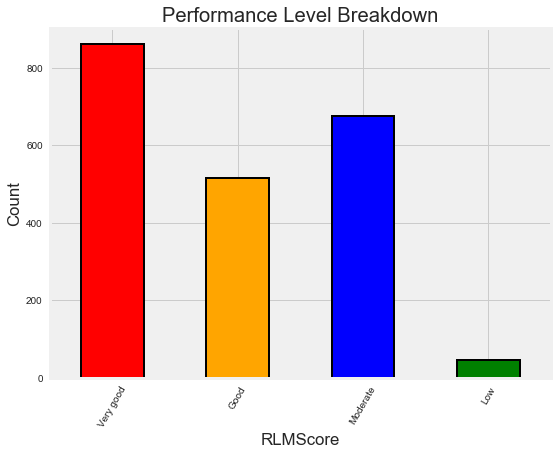

In [258]:
from collections import OrderedDict

plt.figure(figsize = (20, 16))
plt.style.use('fivethirtyeight')
# Color mapping
colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
poverty_mapping = OrderedDict({1: 'Very good', 2: 'Good', 3: 'Moderate', 4: 'Low'})


label_counts = segmented_rfm['RLMScore'].value_counts().sort_index()

# Bar plot of occurrences of each label
label_counts.plot.bar(figsize = (8, 6), 
                      color = colors.values(),
                      edgecolor = 'k', linewidth = 2)

# Formatting
plt.xlabel('RLMScore'); plt.ylabel('Count'); 
plt.xticks([x - 1 for x in poverty_mapping.keys()], 
           list(poverty_mapping.values()), rotation = 60)
plt.title('Performance Level Breakdown');

label_counts

### Question C

If you had to design a metric system for an in-game store with soft and hard currencies, what metrics (up to 10) would you monitor and why?

#### User metrics:

- new users: Knowing how many new users start playing the game in a particular month can really help visualize the growth of of it; also enbales to quantify which marketing channel works best
- total playtime per player and when (during the day/night):For the active players, I would separate them by day-hours and night-hours (hours corresponding to their country, log-in hour), minutes spent, in order to know when is best time to upgrade or release version.

#### Customer metrics:

- revenue per user in hard currencies : how much money has spent and how/on what did spend it (useful to asses 
- revenue per user in soft  currencies: how much points has and how/on what did spend it (useful to 


#### Performance metrics

- rate at which a game executes on a client hardware platform (to know on which platform chancges/updates have to be made)
- impact of patches and updates on how well the client executes: 
- monitoring changing features
- number of bugs found – per hour, day, week or any other timeframe

